In [1]:
import pandas as pd
import numpy as np
import csv
import os
import time
from sklearn.manifold import TSNE

os.chdir('/san-data/usecase/magnet_g/misc/PCA_DATA_VIS') 
data = np.genfromtxt('new_datas2.csv', delimiter = ',', max_rows = 10000, names = True, dtype = None)
df = pd.DataFrame(data)

In [2]:
df = df.drop(["trip_number", "timestmp_local", "Hour_editing_needed", "Date", "speed_lim1", 
              "Hour", "Minute", "Second", "latitude", "longitude", "ratio", "road_type",
              "algorithm", "lag_speed"], axis = 1)
df['Mode'] = np.where(df['lonG'] >= 0, 'Acceleration', 'Deceleration')
df = df.dropna(axis = 0, how = "all")
rndperm = np.random.permutation(df.shape[0])

In [3]:
n_sne = 3000
time_start = time.time()
tsne = TSNE(n_components = 2, verbose = 1, perplexity = 40, n_iter = 300)
tsne_results = tsne.fit_transform(df.loc[rndperm[:n_sne], list(df)[:-1]].values)
print 't-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 0.119322
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.964874
[t-SNE] Error after 300 iterations: 0.964874
t-SNE done! Time elapsed: 61.0019519329 seconds


In [6]:
df_tsne = df.loc[rndperm[:n_sne],:].copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]
df_tsne = df_tsne.dropna(axis = 0, how = "all")

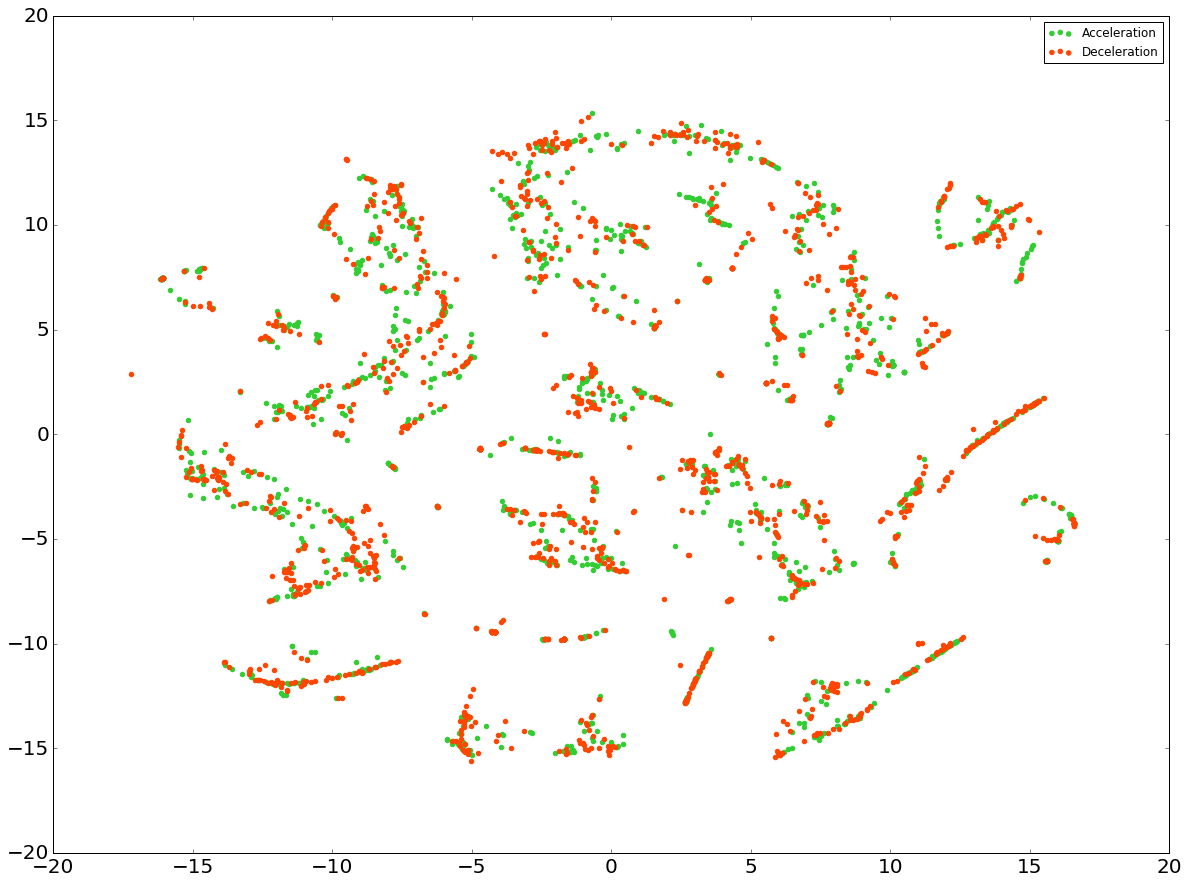

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize = (20, 15))
ax.scatter(df_tsne['x-tsne'], df_tsne['y-tsne'].where(df_tsne['Mode'] == 'Acceleration'), label = "Acceleration", color = "limegreen")
ax.scatter(df_tsne['x-tsne'], df_tsne['y-tsne'].where(df_tsne['Mode'] == 'Deceleration'), label = "Deceleration", color = "orangered")
ax.legend()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.show()